# Supervisor and simulation test notebook for the MICRO-502 course project

## Mission simulation

### Navigating to search area

MAP RESET
Computation time for 80 instances : 0.46754884719848633
Time per instance : 0.0058466106653213504
Collision number : 0


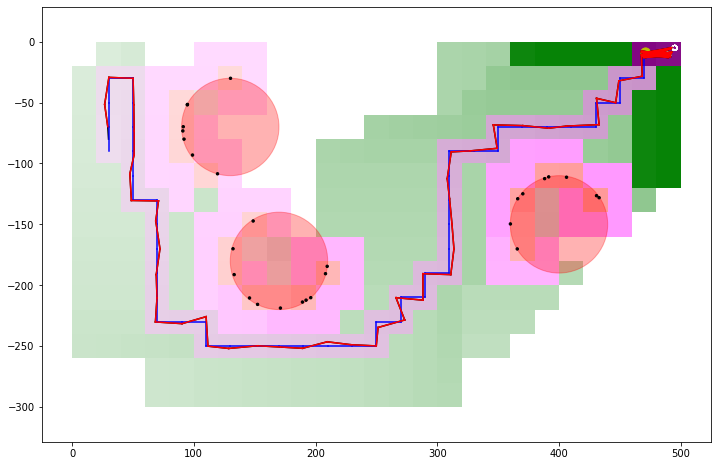

<Figure size 432x288 with 0 Axes>

In [3]:
from global_nav import GlobalNav
from simulation.global_display import GlobalDisplay as disp
from simulation.global_simulator import Simulator
import random
import time
import matplotlib.pyplot as plt

# we define a grid that matches the dimension of the exam
glonav = GlobalNav(
            width = 500,
            height = 300,
            cols = 25,
            rows = 15,
            drone_x = 30,
            drone_y = 80,
            diag = False,
            decay = 0.025, 
            radius = 1
        )

sim = Simulator(glonav,2,0,0)

goal_x = 495
goal_y = 5

# defines a simulation step
def step():
    sim.sense()
    sim.check_collisions()
    [wx,wy] = glonav.navTo(goal_x,goal_y)
    nx, ny = sim.waypoint_line(wx,wy)
    glonav.update(nx,ny)
    
# add a bunch of test obstacles
sim.add_obstacle(130,70,40)
sim.add_obstacle(170,180,40)
sim.add_obstacle(400,150,40)
    
#simulate steps

instances = 80
random.seed(1)
start_time = time.time()
for i in range(instances):
#    if i%20 == 0:
#        disp.showGrid(glonav,sim,mapContours=False)
    step()
print("Computation time for "+str(instances)+ " instances : "+ str(time.time() - start_time))
print("Time per instance : " +str((time.time() - start_time)/instances))
#disp.showGrid(glonav,sim,mapContours=False)


print("Collision number : " + str(len(sim.collisions)))
if len(sim.collisions)>0:
    print("This is why we need a local avoidance loop lol")
    
disp.showGrid(glonav,sim,confidenceAsAlpha = True,save="nav.pdf")

#disp.showNavGraph(glonav)

MAP RESET
Computation time for 70 instances : 0.34750795364379883


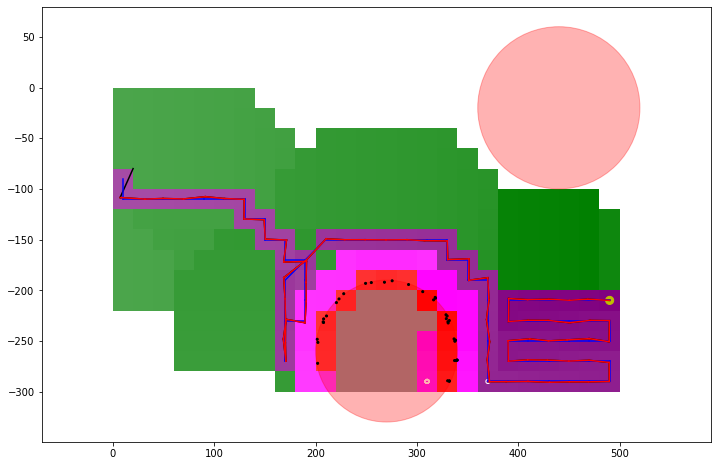

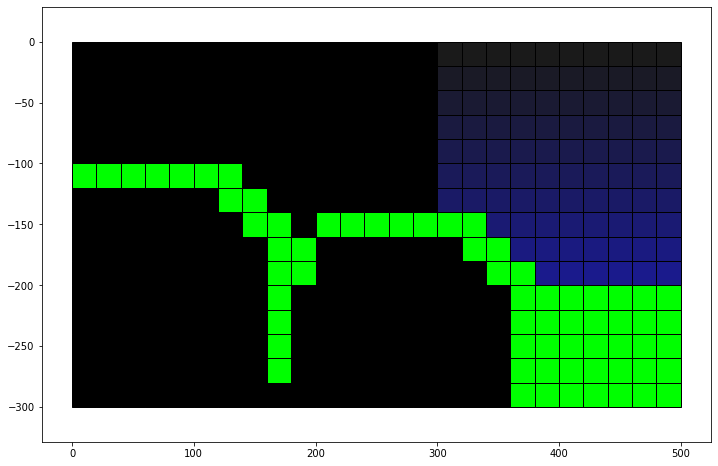

In [1]:
from global_nav import GlobalNav
from simulation.global_display import GlobalDisplay as disp
from simulation.global_simulator import Simulator
import random
import time

def step():
    sim.sense()
    sim.check_collisions()
    [wx,wy] = glonav.cover()
    nx, ny = sim.waypoint_line(wx,wy)
    glonav.update(nx,ny,delta_t=0.1)
    

glonav = GlobalNav(
            width = 500,
            height = 300,
            cols = 25,
            rows = 15,
            drone_x = 20,
            drone_y = 80,
            diag = False,
            decay = 0.005, 
            radius = 1
        )
sim = Simulator(
    nav = glonav,
    sigma_flight = 1,
    sigma_sense = 1,
    int_error = 0)    
#simulate steps

sim.add_obstacle(440,20,80)
sim.add_obstacle(270,260,70)
random.seed(1)
instances = 70
start_time = time.time()
glonav.cover_area(15,0,25,14)
for i in range(instances):
    step()

    
print("Computation time for "+str(instances)+ " instances : "+ str(time.time() - start_time))
    
disp.showGrid(glonav,sim,confidenceAsAlpha = True)
disp.showPotential(glonav)

0

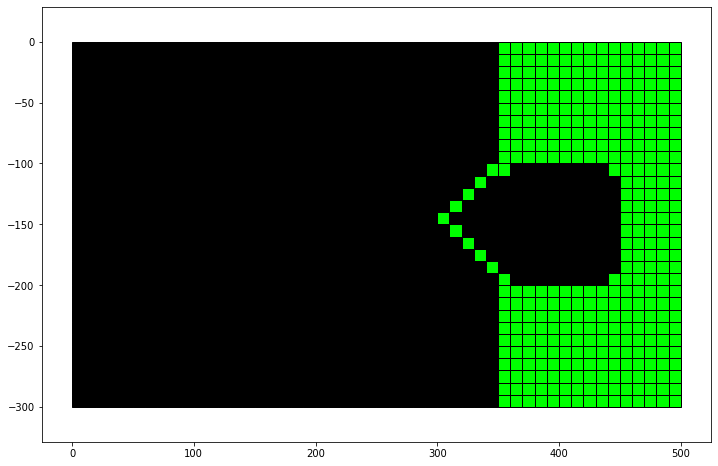

In [4]:
disp.showPotential(glonav)

In [5]:
goal_x = 30
goal_y = 150

# defines a simulation step
def step():
    sim.sense()
    sim.check_collisions()
    [wx,wy] = glonav.navTo(goal_x,goal_y)
    nx, ny = sim.waypoint_line(wx,wy)
    glonav.update(nx,ny)

instances = 300
start_time = time.time()
for i in range(instances):
#    if i%50 == 0:
#        disp.showGrid(glonav)
    step()
print("Computation time for "+str(instances)+ " instances : "+ str(time.time() - start_time))
#disp.showGrid(glonav)

deleting component
Computation time for 300 instances : 1.0641791820526123


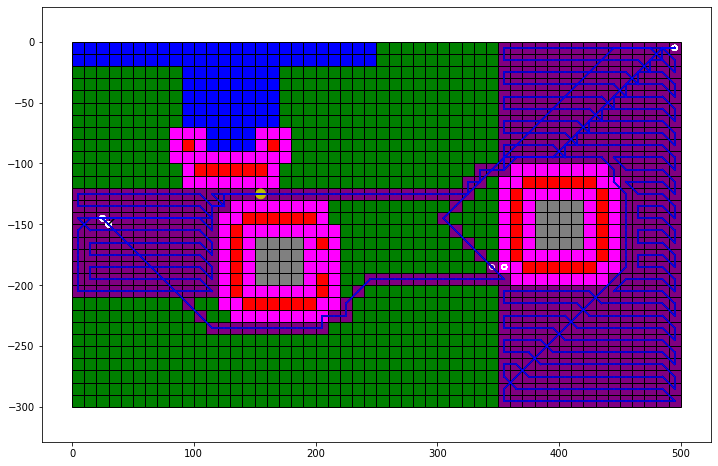

In [6]:
def step():
    sim.sense()
    sim.check_collisions()
    [wx,wy] = glonav.cover()
    nx, ny = sim.waypoint_line(wx,wy)
    glonav.update(nx,ny)
    
glonav.cover_area(0,10,15,20)
#simulate steps
#disp.showPotential(glonav)
random.seed(1)
instances = 400
start_time = time.time()
for i in range(instances):
    step()
    
disp.showGrid(glonav)

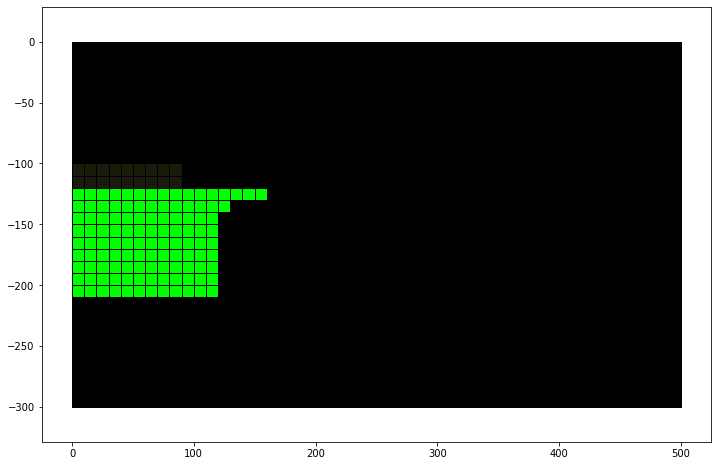

In [6]:
disp.showPotential(glonav)

In [18]:
print(glonav.is_in_cover_area(glonav.dc,glonav.dr))
print(glonav.super_node_id((glonav.dc,glonav.dr),3))

#glonav.coarse_tilings[3].nodes

True
None


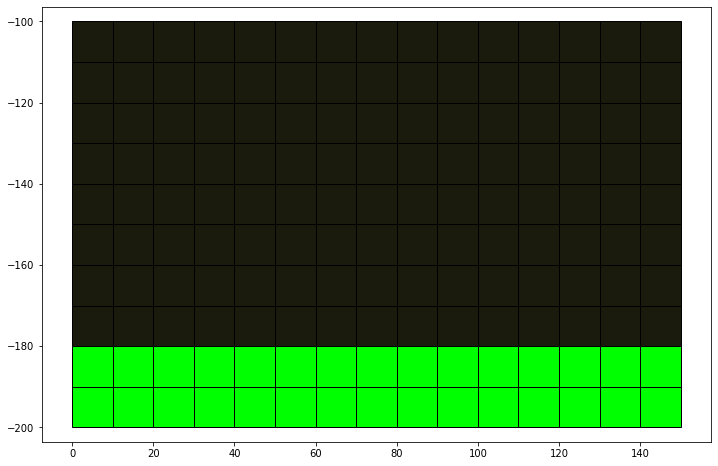

In [9]:
disp.showLevel(glonav,3)

In [11]:
print((glonav.dc,glonav.dr))
print(glonav.nav_state)
glonav.is_in_cover_area(glonav.dc,glonav.dr)

(15, 12)
cover


True